In [1]:
#import necessary packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import scipy.stats as stats
from scipy.stats import chi2_contingency
import math

%matplotlib inline
from scipy.stats import norm
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
df = pd.read_excel('SampleDonorData.xlsx')

# Exploratory Data Analysis

In [3]:
#Exploratory Data Analysis
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 19372 rows and 25 columns.


In [4]:
df.head(20)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
0,0,0,89765,77,0.0,0,S,20.0,U,M,...,72,0,0,A3,0.375,21.0,14,13,21,75
1,0,0,137263,137,0.0,0,C,23.0,H,M,...,97,1,0,A3,0.222,18.0,37,14,18,127
2,0,0,89966,137,2.0,0,C,23.0,H,M,...,78,1,0,A1,0.125,18.0,12,13,18,129
3,0,0,100147,137,2.0,0,S,21.0,H,M,...,79,1,0,A2,0.125,17.0,10,7,15,130
4,0,0,148098,77,2.0,0,S,20.0,H,F,...,42,1,0,A1,0.100,26.0,25,6,26,67
5,1,13,179339,53,4.0,0,T,35.0,H,M,...,90,1,0,A4,0.500,16.0,9,13,16,53
6,0,0,7799,137,6.0,1,U,9.0,U,F,...,40,1,0,A1,0.200,23.0,9,34,5,126
7,0,0,12542,137,6.0,1,S,13.0,U,M,...,80,1,0,A3,0.333,16.0,10,31,8,125
8,0,0,36636,89,6.0,0,C,23.0,H,F,...,44,0,0,A1,0.273,24.0,21,11,24,88
9,0,0,37268,125,6.0,0,U,8.0,U,F,...,67,1,1,S2,0.182,17.0,27,13,17,124


In [5]:
#median home value in $100 and median household income in $100
MEDIAN_HOME_VALUE_IN_100 = df['MEDIAN_HOME_VALUE'] *100
#MEDIAN_HOME_VALUE_IN_100

MEDIAN_HOUSEHOLD_INCOME_IN_100 = df['MEDIAN_HOUSEHOLD_INCOME']*100
#MEDIAN_HOUSEHOLD_INCOME_IN_100

In [6]:
#Append the new variables into the dataset
df['MEDIAN_HOUSEHOLD_INCOME_IN_100'] = MEDIAN_HOUSEHOLD_INCOME_IN_100

In [7]:
df['MEDIAN_HOME_VALUE_IN_100'] = MEDIAN_HOME_VALUE_IN_100

In [8]:
#drop the original observations
df.drop(['MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME'], axis = 1, inplace = True)

In [9]:
#Getting the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 25 columns):
TARGET_B                          19372 non-null int64
TARGET_D                          19372 non-null int64
CONTROL_NUMBER                    19372 non-null int64
MONTHS_SINCE_ORIGIN               19372 non-null int64
DONOR_AGE                         14577 non-null float64
IN_HOUSE                          19372 non-null int64
URBANICITY                        19372 non-null object
CLUSTER_CODE                      18918 non-null float64
HOME_OWNER                        19372 non-null object
DONOR_GENDER                      19372 non-null object
INCOME_GROUP                      14980 non-null float64
PUBLISHED_PHONE                   19372 non-null int64
WEALTH_RATING                     10562 non-null float64
PCT_OWNER_OCCUPIED                19372 non-null int64
PEP_STAR                          19372 non-null int64
RECENT_STAR_STATUS                19372 non-null int64


In [10]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Columns: 25 entries, TARGET_B to MEDIAN_HOME_VALUE_IN_100
dtypes: float64(6), int64(15), object(4)
memory usage: 3.7+ MB


In [11]:
#Summary statistics for the Last Gift Amount
#pd.set_option('precision', 3)
df['LAST_GIFT_AMT'].describe().transpose()

count    19372.000000
mean        16.584503
std         11.977709
min          0.000000
25%         10.000000
50%         15.000000
75%         20.000000
max        450.000000
Name: LAST_GIFT_AMT, dtype: float64

Create a Histogram for a continuous variable

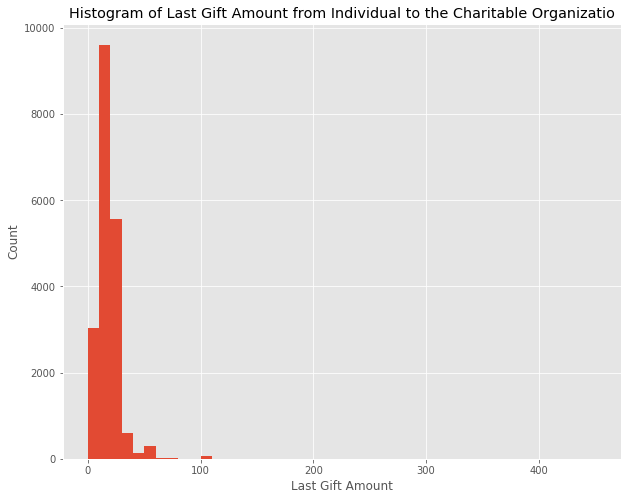

In [12]:
#Create Histogram of Last Gift Amount observation
plt.figure(figsize = (10, 8))
plt.title("Histogram of Last Gift Amount from Individual to the Charitable Organizatio")
plt.hist(df['LAST_GIFT_AMT'].values, bins = 45)
plt.xlabel("Last Gift Amount")
plt.ylabel("Count")
plt.show()

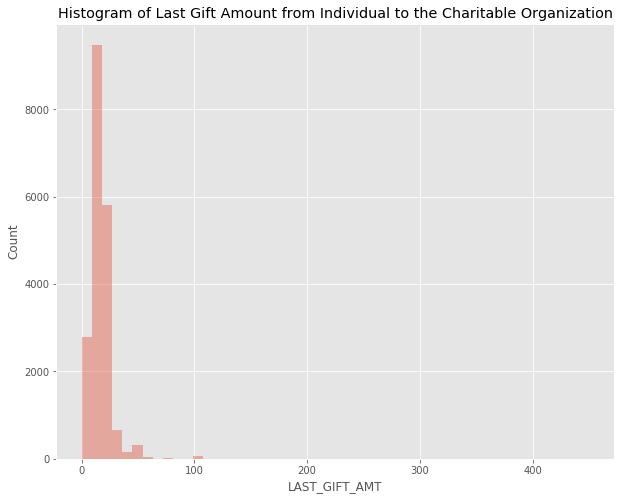

In [13]:
#Visualize with seaborn
plt.figure(figsize = (10, 8))
plt.ylabel("Count")
plt.title("Histogram of Last Gift Amount from Individual to the Charitable Organization")
sns.distplot(df.LAST_GIFT_AMT, kde=False)

In [14]:
#Providing mean, median and standard dwviation values
Last_Gift_Amount_Mean_Value = df['LAST_GIFT_AMT'].mean()
Last_Gift_Amount_Mean_Value

16.584503406979145

In [15]:
Last_Gift_Amount_Median_Value = df['LAST_GIFT_AMT'].median()
Last_Gift_Amount_Median_Value

15.0

In [16]:
Last_Gift_Amount_Stbadard_Deviation_Value = df['LAST_GIFT_AMT'].std()
Last_Gift_Amount_Stbadard_Deviation_Value

11.977709469261692

Providing Confidence Intervals for Last Gift Amount Varable

In [17]:
#Count number of zeros in the 'Last Gift Amount Variable'
print((df['LAST_GIFT_AMT'] ==0).sum())

75


In [18]:
#95% confidence level
z_critical_value = norm.ppf(0.975)
z_critical_value


1.959963984540054

In [19]:
#sample_size = n = length of the variable being considered
sample = n = 19372- 75
n
margin_of_error = z_critical_value * (Last_Gift_Amount_Stbadard_Deviation_Value/math.sqrt(n))
confidence_interval = (Last_Gift_Amount_Mean_Value- margin_of_error, Last_Gift_Amount_Mean_Value + margin_of_error)


print("z_critical_value:", z_critical_value)
print("Confidence interval:")
print(confidence_interval)

z_critical_value: 1.959963984540054
Confidence interval:
(16.415507196105118, 16.753499617853173)


Create a correation matrix for all continuous variables

In [20]:
#considering continuous variables alone
continuous_variables = df.drop(['TARGET_B' ,'IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING', 'PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status'], axis =1)
continuous_variables.head(15)

,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,PCT_OWNER_OCCUPIED,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
0,0,89765,77,0.0,72,0.375,21.0,14,13,21,75,37400,108300
1,0,137263,137,0.0,97,0.222,18.0,37,14,18,127,26600,70500
2,0,89966,137,2.0,78,0.125,18.0,12,13,18,129,40700,80900
3,0,100147,137,2.0,79,0.125,17.0,10,7,15,130,25600,46400
4,0,148098,77,2.0,42,0.100,26.0,25,6,26,67,34200,162500
5,13,179339,53,4.0,90,0.500,16.0,9,13,16,53,63100,232100
6,0,7799,137,6.0,40,0.200,23.0,9,34,5,126,20300,64100
7,0,12542,137,6.0,80,0.333,16.0,10,31,8,125,49400,117700
8,0,36636,89,6.0,44,0.273,24.0,21,11,24,88,30300,169600
9,0,37268,125,6.0,67,0.182,17.0,27,13,17,124,24300,66200


In [21]:
continuous_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 13 columns):
TARGET_D                          19372 non-null int64
CONTROL_NUMBER                    19372 non-null int64
MONTHS_SINCE_ORIGIN               19372 non-null int64
DONOR_AGE                         14577 non-null float64
PCT_OWNER_OCCUPIED                19372 non-null int64
RECENT_CARD_RESPONSE_PROP         19372 non-null float64
MONTHS_SINCE_LAST_PROM_RESP       19126 non-null float64
LAST_GIFT_AMT                     19372 non-null int64
NUMBER_PROM_12                    19372 non-null int64
MONTHS_SINCE_LAST_GIFT            19372 non-null int64
MONTHS_SINCE_FIRST_GIFT           19372 non-null int64
MEDIAN_HOUSEHOLD_INCOME_IN_100    19372 non-null int64
MEDIAN_HOME_VALUE_IN_100          19372 non-null int64
dtypes: float64(3), int64(10)
memory usage: 1.9 MB


In [22]:
#correlation matrix for all continuos variables
corr = continuous_variables.corr()
corr

,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,PCT_OWNER_OCCUPIED,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
TARGET_D,1.000000,0.025529,0.003485,0.009811,0.009178,-0.003454,-0.005348,0.196432,0.054310,-0.033914,0.005893,0.069896,0.082961
CONTROL_NUMBER,0.025529,1.000000,-0.077874,-0.007441,-0.099438,0.019523,-0.004883,0.000228,-0.316467,0.046103,-0.086687,0.104717,0.258975
MONTHS_SINCE_ORIGIN,0.003485,-0.077874,1.000000,0.236176,0.036224,-0.197896,0.048813,-0.099205,0.149149,-0.027650,0.987825,-0.037086,-0.047490
DONOR_AGE,0.009811,-0.007441,0.236176,1.000000,-0.017776,-0.024603,-0.025662,-0.050276,0.093864,-0.081111,0.235322,-0.061093,-0.001373
PCT_OWNER_OCCUPIED,0.009178,-0.099438,0.036224,-0.017776,1.000000,-0.013065,0.001380,-0.002517,0.003003,0.011584,0.036404,0.443672,0.037510
RECENT_CARD_RESPONSE_PROP,-0.003454,0.019523,-0.197896,-0.024603,-0.013065,1.000000,-0.250381,-0.219906,0.007450,-0.186172,-0.197631,-0.016032,-0.012130
MONTHS_SINCE_LAST_PROM_RESP,-0.005348,-0.004883,0.048813,-0.025662,0.001380,-0.250381,1.000000,0.129642,-0.151291,0.672394,0.049261,0.017640,0.006121
LAST_GIFT_AMT,0.196432,0.000228,-0.099205,-0.050276,-0.002517,-0.219906,0.129642,1.000000,0.073477,0.090260,-0.100737,0.093304,0.106973
NUMBER_PROM_12,0.054310,-0.316467,0.149149,0.093864,0.003003,0.007450,-0.151291,0.073477,1.000000,-0.512797,0.162079,0.017326,0.031217
MONTHS_SINCE_LAST_GIFT,-0.033914,0.046103,-0.027650,-0.081111,0.011584,-0.186172,0.672394,0.090260,-0.512797,1.000000,-0.033261,0.008434,-0.011468


Text(0.5, 1, 'Heatmap Correlation for Continuos Variables')

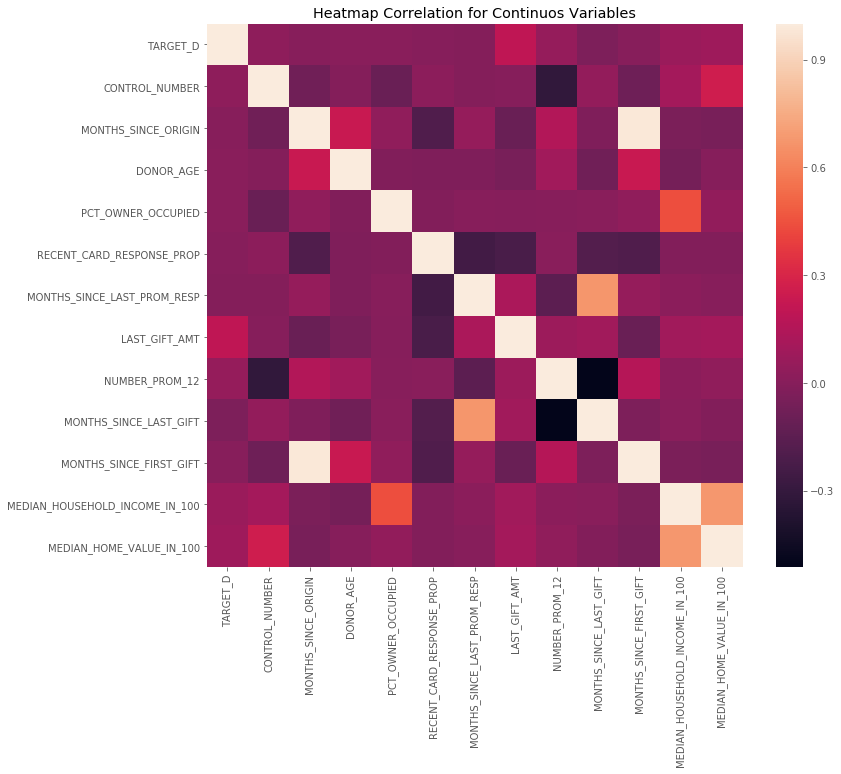

In [23]:
#heatmap correlation visualization
corr = continuous_variables.corr()
plt.figure(figsize=(12,10))
heatviz = sns.heatmap(data = corr)
plt.title('Heatmap Correlation for Continuos Variables')

Create a Chi-square Test of Association for All Categorial Variables

In [24]:
#considering categorical variables
categorical_variables = df[['TARGET_B' ,'IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING', 'PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']]
categorical_variables.head(15)

,TARGET_B,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,WEALTH_RATING,PEP_STAR,RECENT_STAR_STATUS,recency_freq_status
0,0,0,S,20.0,U,M,2.0,1,3.0,0,0,A3
1,0,0,C,23.0,H,M,2.0,1,5.0,1,0,A3
2,0,0,C,23.0,H,M,5.0,0,6.0,1,0,A1
3,0,0,S,21.0,H,M,1.0,0,4.0,1,0,A2
4,0,0,S,20.0,H,F,5.0,1,5.0,1,0,A1
5,1,0,T,35.0,H,M,7.0,1,8.0,1,0,A4
6,0,1,U,9.0,U,F,1.0,0,8.0,1,0,A1
7,0,1,S,13.0,U,M,NaN,0,9.0,1,0,A3
8,0,0,C,23.0,H,F,1.0,0,8.0,0,0,A1
9,0,0,U,8.0,U,F,1.0,1,2.0,1,1,S2


In [25]:
categorical_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 12 columns):
TARGET_B               19372 non-null int64
IN_HOUSE               19372 non-null int64
URBANICITY             19372 non-null object
CLUSTER_CODE           18918 non-null float64
HOME_OWNER             19372 non-null object
DONOR_GENDER           19372 non-null object
INCOME_GROUP           14980 non-null float64
PUBLISHED_PHONE        19372 non-null int64
WEALTH_RATING          10562 non-null float64
PEP_STAR               19372 non-null int64
RECENT_STAR_STATUS     19372 non-null int64
recency_freq_status    19372 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 1.8+ MB


In [26]:
categorical_variables.dtypes

TARGET_B                 int64
IN_HOUSE                 int64
URBANICITY              object
CLUSTER_CODE           float64
HOME_OWNER              object
DONOR_GENDER            object
INCOME_GROUP           float64
PUBLISHED_PHONE          int64
WEALTH_RATING          float64
PEP_STAR                 int64
RECENT_STAR_STATUS       int64
recency_freq_status     object
dtype: object

In [27]:
# Converting the categorical variables(as per data desciption) into object type
df[['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER',
    'INCOME_GROUP', 'PUBLISHED_PHONE','WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']] = df[['IN_HOUSE', 'URBANICITY','CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER', 'INCOME_GROUP','PUBLISHED_PHONE',
    'WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']].astype('object')
df[['IN_HOUSE', 'TARGET_B', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER',
    'INCOME_GROUP', 'PUBLISHED_PHONE','WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']].dtypes

IN_HOUSE               object
TARGET_B                int64
URBANICITY             object
CLUSTER_CODE           object
HOME_OWNER             object
DONOR_GENDER           object
INCOME_GROUP           object
PUBLISHED_PHONE        object
WEALTH_RATING          object
PEP_STAR               object
RECENT_STAR_STATUS     object
recency_freq_status    object
dtype: object

0    75.0
1    25.0
Name: TARGET_B, dtype: float64


pandas.core.series.Series

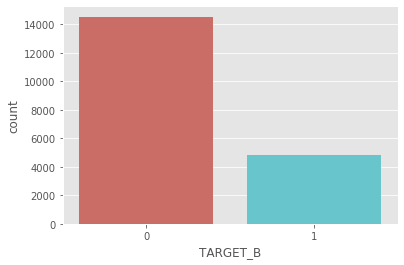

In [28]:
# Distribution of levels in the categorical variable
print(df['TARGET_B'].value_counts(normalize= True)*100)
sns.countplot(x='TARGET_B',data=df, palette='hls')
#plt.show()

# Changing the type of the variable
df['TARGET_B'] = df['TARGET_B'].astype('object')
type(df['TARGET_B'])

In [29]:
#changing variable type to get ordinal categorical variables
#df['TARGET_B'] = df['TARGET_B'].astype('object')
#type(df['TARGET_B'])

#selecting categorical variables alone
# Selecting only categorical variables from the data set
#norm_categorical_var = df.select_dtypes(include=['object']).columns
#norm_categorical_var

In [30]:
# Cheking for uninterpretable valuesin the variables
df['IN_HOUSE'].value_counts()
df['URBANICITY'].value_counts()
df['CLUSTER_CODE'].value_counts()
df['HOME_OWNER'].value_counts()
df['INCOME_GROUP'].value_counts()
df['PUBLISHED_PHONE'].value_counts()
df['WEALTH_RATING'].value_counts()
df['PEP_STAR'].value_counts()
df['RECENT_STAR_STATUS'].value_counts()

# Check if you would like to merge the value '1' into other categories
df['DONOR_GENDER'].value_counts()

# Check if there exists any possibility or merging entries with values less than 100
df['recency_freq_status'].value_counts()
df['TARGET_B'].value_counts()

0    14529
1     4843
Name: TARGET_B, dtype: int64

In [31]:
# Checking for missing values
categorical_variables.isnull().sum()

TARGET_B                  0
IN_HOUSE                  0
URBANICITY                0
CLUSTER_CODE            454
HOME_OWNER                0
DONOR_GENDER              0
INCOME_GROUP           4392
PUBLISHED_PHONE           0
WEALTH_RATING          8810
PEP_STAR                  0
RECENT_STAR_STATUS        0
recency_freq_status       0
dtype: int64

In [33]:
# Replacing '?' values in 'URBANICITY' ('?' is a missing value)

'''df['URBANICITY'] = df['URBANICITY'].replace('?', np.NaN)
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)'''

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = '?', strategy = 'most_frequent')
imputer_NaN = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

df['URBANICITY'] = imputer_NaN.fit_transform(df[['URBANICITY']])
#df['CLUSTER_CODE'] = imputer_NaN.fit_transform(df[['CLUSTER_CODE']])
#df['INCOME_GROUP'] = imputer_NaN.fit_transform(df[['INCOME_GROUP']])
#df['WEALTH_RATING'] = imputer_NaN.fit_transform(df[['WEALTH_RATING']])

In [34]:
# rechecking for missing values
df.loc[:,['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER','INCOME_GROUP', 'PUBLISHED_PHONE',
                  'WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']].isnull().sum()

IN_HOUSE               0
URBANICITY             0
CLUSTER_CODE           0
HOME_OWNER             0
DONOR_GENDER           0
INCOME_GROUP           0
PUBLISHED_PHONE        0
WEALTH_RATING          0
PEP_STAR               0
RECENT_STAR_STATUS     0
recency_freq_status    0
dtype: int64

Create chi-square test of association for norminal categorical variables and the target variable

In [35]:
#test association for 'UBANICITY' and 'TARGET_B'
cont = pd.crosstab(df['URBANICITY'],df['TARGET_B'])
chi,p_val,n,exp = chi2_contingency(cont)
chi,p_val,n,exp

(24.007622210716505, 0.00021638192404491012, 5, array([[ 340.5 ,  113.5 ],
        [3016.5 , 1005.5 ],
        [3003.75, 1001.25],
        [3368.25, 1122.75],
        [2958.  ,  986.  ],
        [1842.  ,  614.  ]]))

In [36]:
#test association for 'HOME_OWNER' and 'TARGET_B'
cont = pd.crosstab(df['HOME_OWNER'],df['TARGET_B'])
chi,p_val,n,exp = chi2_contingency(cont)
chi,p_val,n,exp

(3.484946804239553, 0.061929351732607794, 1, array([[7954.5, 2651.5],
        [6574.5, 2191.5]]))

In [37]:
#test association for 'DONOR_GENDER' and 'TARGET_B'
cont = pd.crosstab(df['DONOR_GENDER'],df['TARGET_B'])
chi,p_val,n,exp = chi2_contingency(cont)
chi,p_val,n,exp

(4.972669701447588, 0.17380937695876134, 3, array([[7.50000e-01, 2.50000e-01],
        [7.80075e+03, 2.60025e+03],
        [5.96475e+03, 1.98825e+03],
        [7.62750e+02, 2.54250e+02]]))

In [38]:
#test association for 'recency_freq_status' and 'TARGET_B'
cont = pd.crosstab(df['recency_freq_status'],df['TARGET_B'])
chi,p_val,n,exp = chi2_contingency(cont)
chi,p_val,n,exp

(435.75288406266964,
 1.660002372679204e-78,
 22,
 array([[5.10075e+03, 1.70025e+03],
        [1.72800e+03, 5.76000e+02],
        [1.21050e+03, 4.03500e+02],
        [8.99250e+02, 2.99750e+02],
        [1.98750e+02, 6.62500e+01],
        [3.75000e+01, 1.25000e+01],
        [3.22500e+01, 1.07500e+01],
        [5.17500e+01, 1.72500e+01],
        [1.08900e+03, 3.63000e+02],
        [3.97500e+01, 1.32500e+01],
        [4.50000e+00, 1.50000e+00],
        [7.50000e+00, 2.50000e+00],
        [6.52500e+01, 2.17500e+01],
        [3.00000e+00, 1.00000e+00],
        [1.50000e+00, 5.00000e-01],
        [3.27750e+02, 1.09250e+02],
        [2.75250e+02, 9.17500e+01],
        [2.24250e+02, 7.47500e+01],
        [6.67500e+01, 2.22500e+01],
        [5.70000e+01, 1.90000e+01],
        [1.05975e+03, 3.53250e+02],
        [1.01700e+03, 3.39000e+02],
        [1.03200e+03, 3.44000e+02]]))

In [39]:
# Chi-square test wrt to target variable
cont = pd.crosstab(df['URBANICITY'],df['TARGET_B'])
chi,p_val,n,exp = chi2_contingency(cont)
print("{} is the Chi-square value, {} is the p-value, {} is the degree of freedom, \n {} is the value of expected array".
      format(round(chi,2),round(p_val,5),n,exp))

#df[['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER','INCOME_GROUP', 'PUBLISHED_PHONE',
#            'WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']]

chi,p_val_IN_HOUSE,n,exp            = chi2_contingency(pd.crosstab(df['IN_HOUSE'],df['TARGET_B']))
chi,p_val_URBANICITY,n,exp          = chi2_contingency(pd.crosstab(df['URBANICITY'],df['TARGET_B']))
chi,p_val_CLUSTER_CODE,n,exp        = chi2_contingency(pd.crosstab(df['CLUSTER_CODE'],df['TARGET_B']))
chi,p_val_HOME_OWNER,n,exp          = chi2_contingency(pd.crosstab(df['HOME_OWNER'],df['TARGET_B']))
chi,p_val_DONOR_GENDER,n,exp        = chi2_contingency(pd.crosstab(df['DONOR_GENDER'],df['TARGET_B']))
chi,p_val_INCOME_GROUP,n,exp        = chi2_contingency(pd.crosstab(df['INCOME_GROUP'],df['TARGET_B']))
chi,p_val_PUBLISHED_PHONE,n,exp     = chi2_contingency(pd.crosstab(df['PUBLISHED_PHONE'],df['TARGET_B']))
chi,p_val_WEALTH_RATING,n,exp       = chi2_contingency(pd.crosstab(df['WEALTH_RATING'],df['TARGET_B']))
chi,p_val_PEP_STAR,n,exp            = chi2_contingency(pd.crosstab(df['PEP_STAR'],df['TARGET_B']))
chi,p_val_RECENT_STAR_STATUS,n,exp  = chi2_contingency(pd.crosstab(df['RECENT_STAR_STATUS'],df['TARGET_B']))
chi,p_val_recency_freq_status,n,exp = chi2_contingency(pd.crosstab(df['recency_freq_status'],df['TARGET_B']))

# Respective chi-square values are
print("\nDegree of association of all the categorical variables with respect to the target categorical variable  respectively is")
[p_val_IN_HOUSE,p_val_URBANICITY,p_val_CLUSTER_CODE,p_val_HOME_OWNER,p_val_DONOR_GENDER,p_val_INCOME_GROUP,
 p_val_PUBLISHED_PHONE,p_val_WEALTH_RATING,p_val_PEP_STAR,p_val_RECENT_STAR_STATUS,p_val_recency_freq_status]

24.01 is the Chi-square value, 0.00022 is the p-value, 5 is the degree of freedom, 
 [[ 340.5   113.5 ]
 [3016.5  1005.5 ]
 [3003.75 1001.25]
 [3368.25 1122.75]
 [2958.    986.  ]
 [1842.    614.  ]] is the value of expected array

Degree of association of all the categorical variables with respect to the target categorical variable  respectively is


[1.4307180948504121e-08,
 0.00021638192404491012,
 3.6433819612251835e-06,
 0.061929351732607794,
 0.17380937695876134,
 8.59156329677041e-05,
 0.6661704569688127,
 0.0024623720099651134,
 1.312603216116283e-48,
 6.228206433390768e-41,
 1.660002372679204e-78]

**`Interpretation of the results`**
- The first value (chi) is the Chi-square value, followed by the p-value (p_val), then comes the degrees of freedom (n), and lastly it outputs the expected frequencies(exp) as an array
- Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted
- We can reject the null hypothesis as the p-value is less than 0.05
- The results indicate that there is a relationship between URBANCITY and TARGET_B(as p-value is less than 0.05). Similar conclusions could be derived from the below calculations as well

In [40]:
#test association for 'DONOR_GENDER' and 'TARGET_B'
cont = pd.crosstab(df['DONOR_GENDER'],df['WEALTH_RATING'])
chi,p_val,n,exp = chi2_contingency(cont)
chi,p_val,n,exp

(40.553042316860605,
 0.04544140913866081,
 27,
 array([[3.45343795e-02, 4.40842453e-02, 5.02787528e-02, 5.39954574e-02,
         5.09498245e-02, 5.56473260e-02, 5.76605410e-02, 6.18934545e-02,
         6.44228784e-02, 5.26533141e-01],
        [3.59192081e+02, 4.58520235e+02, 5.22949308e+02, 5.61606752e+02,
         5.29929125e+02, 5.78787838e+02, 5.99727287e+02, 6.43753820e+02,
         6.70062358e+02, 5.47647120e+03],
        [2.74651920e+02, 3.50602003e+02, 3.99866921e+02, 4.29425872e+02,
         4.05203954e+02, 4.42563184e+02, 4.58574282e+02, 4.92238643e+02,
         5.12355152e+02, 4.18751807e+03],
        [3.51214640e+01, 4.48336775e+01, 5.11334916e+01, 5.49133801e+01,
         5.18159715e+01, 5.65933306e+01, 5.86407702e+01, 6.29456432e+01,
         6.55180673e+01, 5.35484204e+02]]))

In [44]:
#test association for 'IN_HOUSE' and 'WEALTH_RATING' (No association p-value is >0.05)
cont = pd.crosstab(df['IN_HOUSE'],df['WEALTH_RATING'])
chi,p_val,n,exp = chi2_contingency(cont)
chi,p_val,n,exp

(219.83539991873602,
 2.2665431766816714e-42,
 9,
 array([[ 620.03024985,  791.48854016,  902.70472847,  969.43444146,
          914.75314887,  999.09209168, 1035.23735288, 1111.23508156,
         1156.64835846, 9453.37600661],
        [  48.96975015,   62.51145984,   71.29527153,   76.56555854,
           72.24685113,   78.90790832,   81.76264712,   87.76491844,
           91.35164154,  746.62399339]]))

In [45]:
#test association for 'recency_freq_status' and 'PUBLISHED_PHONE'
cont = pd.crosstab(df['recency_freq_status'],df['PUBLISHED_PHONE'])
chi,p_val,n,exp = chi2_contingency(cont)
chi,p_val,n,exp

(51.7070751755664,
 0.00034307212001615477,
 22,
 array([[3.41594724e+03, 3.38505276e+03],
        [1.15723312e+03, 1.14676688e+03],
        [8.10665910e+02, 8.03334090e+02],
        [6.02223312e+02, 5.96776688e+02],
        [1.33101900e+02, 1.31898100e+02],
        [2.51135660e+01, 2.48864340e+01],
        [2.15976667e+01, 2.14023333e+01],
        [3.46567210e+01, 3.43432790e+01],
        [7.29297956e+02, 7.22702044e+02],
        [2.66203799e+01, 2.63796201e+01],
        [3.01362792e+00, 2.98637208e+00],
        [5.02271319e+00, 4.97728681e+00],
        [4.36976048e+01, 4.33023952e+01],
        [2.00908528e+00, 1.99091472e+00],
        [1.00454264e+00, 9.95457361e-01],
        [2.19492567e+02, 2.17507433e+02],
        [1.84333574e+02, 1.82666426e+02],
        [1.50179125e+02, 1.48820875e+02],
        [4.47021474e+01, 4.42978526e+01],
        [3.81726203e+01, 3.78273797e+01],
        [7.09709374e+02, 7.03290626e+02],
        [6.81079909e+02, 6.74920091e+02],
        [6.91125336e+02, 6.

# Build a Linear Regression Model Using a Target Variable and Predictor Variables 

In [46]:
df.head()
#df.info()
#df.describe()
#df.columns

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
0,0,0,89765,77,0.0,0,S,20,U,M,...,0,A3,0.375,21.0,14,13,21,75,37400,108300
1,0,0,137263,137,0.0,0,C,23,H,M,...,0,A3,0.222,18.0,37,14,18,127,26600,70500
2,0,0,89966,137,2.0,0,C,23,H,M,...,0,A1,0.125,18.0,12,13,18,129,40700,80900
3,0,0,100147,137,2.0,0,S,21,H,M,...,0,A2,0.125,17.0,10,7,15,130,25600,46400
4,0,0,148098,77,2.0,0,S,20,H,F,...,0,A1,0.100,26.0,25,6,26,67,34200,162500


Text(0.5, 1.0, 'Distribution of Amount of Donation to the Organization')

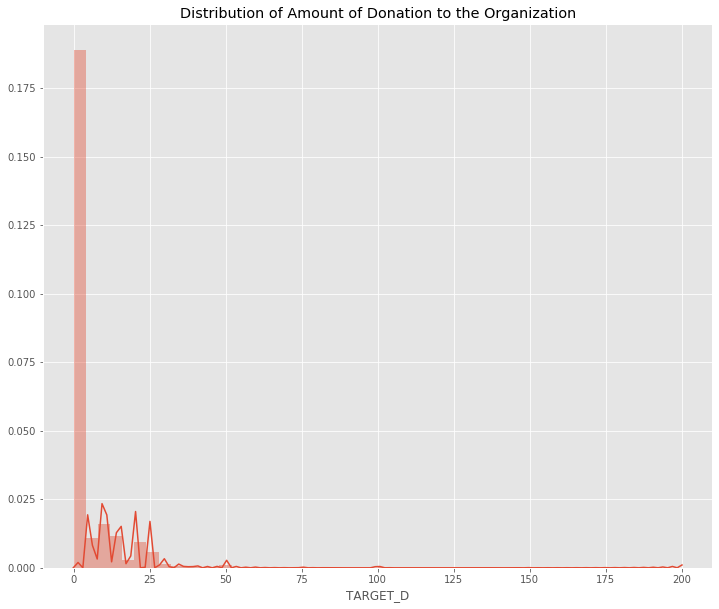

In [47]:
#visualizing the distribution of the target variable
plt.figure(figsize=(12,10))
sns.distplot(df['TARGET_D'])
plt.title('Distribution of Amount of Donation to the Organization')

In [48]:
#Correlation matrix 
df.corr().describe()

,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,PCT_OWNER_OCCUPIED,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.108829,0.066330,0.151882,0.100449,0.111243,-0.007254,0.114437,0.093667,0.047025,0.072492,0.151978,0.175683,0.160369
std,0.274075,0.309259,0.389134,0.289161,0.295892,0.319489,0.340358,0.295228,0.344513,0.376566,0.389686,0.327810,0.318867
min,-0.033914,-0.316467,-0.197896,-0.081111,-0.099438,-0.250381,-0.250381,-0.219906,-0.512797,-0.512797,-0.197631,-0.061093,-0.047490
25%,0.003485,-0.077874,-0.047490,-0.025662,-0.002517,-0.197631,-0.005348,-0.050276,0.003003,-0.033914,-0.046176,-0.016032,-0.011468
50%,0.009811,0.000228,0.003485,-0.007441,0.009178,-0.016032,0.006121,0.073477,0.031217,-0.011468,0.005893,0.017640,0.031217
75%,0.069896,0.046103,0.149149,0.093864,0.036404,-0.003454,0.049261,0.106973,0.093864,0.046103,0.162079,0.104717,0.106973
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1, 'Heatmap Correlation for Sample Donor Dataset')

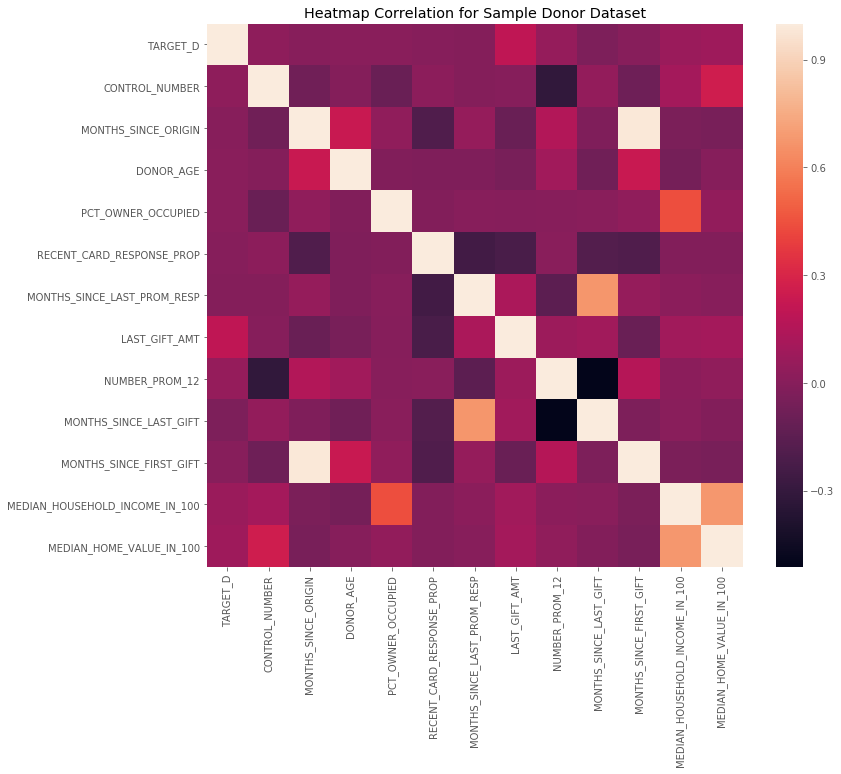

In [49]:
#heatmap correlation visualization
corr = df.corr()
plt.figure(figsize=(12,10))
heatviz = sns.heatmap(data = corr)
plt.title('Heatmap Correlation for Sample Donor Dataset')

Data Preparation and Cleaning

In [50]:
df.head(15)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
0,0,0,89765,77,0.0,0,S,20,U,M,...,0,A3,0.375,21.0,14,13,21,75,37400,108300
1,0,0,137263,137,0.0,0,C,23,H,M,...,0,A3,0.222,18.0,37,14,18,127,26600,70500
2,0,0,89966,137,2.0,0,C,23,H,M,...,0,A1,0.125,18.0,12,13,18,129,40700,80900
3,0,0,100147,137,2.0,0,S,21,H,M,...,0,A2,0.125,17.0,10,7,15,130,25600,46400
4,0,0,148098,77,2.0,0,S,20,H,F,...,0,A1,0.100,26.0,25,6,26,67,34200,162500
5,1,13,179339,53,4.0,0,T,35,H,M,...,0,A4,0.500,16.0,9,13,16,53,63100,232100
6,0,0,7799,137,6.0,1,U,9,U,F,...,0,A1,0.200,23.0,9,34,5,126,20300,64100
7,0,0,12542,137,6.0,1,S,13,U,M,...,0,A3,0.333,16.0,10,31,8,125,49400,117700
8,0,0,36636,89,6.0,0,C,23,H,F,...,0,A1,0.273,24.0,21,11,24,88,30300,169600
9,0,0,37268,125,6.0,0,U,8,U,F,...,1,S2,0.182,17.0,27,13,17,124,24300,66200


In [53]:
#Total missing values for each feature
#print(donor_data.isnull().sum())

In [54]:
print(df.isnull().sum())

TARGET_B                             0
TARGET_D                             0
CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
DONOR_AGE                         4795
IN_HOUSE                             0
URBANICITY                           0
CLUSTER_CODE                         0
HOME_OWNER                           0
DONOR_GENDER                         0
INCOME_GROUP                         0
PUBLISHED_PHONE                      0
WEALTH_RATING                        0
PCT_OWNER_OCCUPIED                   0
PEP_STAR                             0
RECENT_STAR_STATUS                   0
recency_freq_status                  0
RECENT_CARD_RESPONSE_PROP            0
MONTHS_SINCE_LAST_PROM_RESP        246
LAST_GIFT_AMT                        0
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
MEDIAN_HOUSEHOLD_INCOME_IN_100       0
MEDIAN_HOME_VALUE_IN_100             0
dtype: int64


In [55]:
#understanding zero observations in continuos variable
print((df[['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'MEDIAN_HOME_VALUE_IN_100', 'MEDIAN_HOUSEHOLD_INCOME_IN_100', 'PCT_OWNER_OCCUPIED', 'RECENT_CARD_RESPONSE_PROP', 'MONTHS_SINCE_LAST_PROM_RESP','LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT' ]] ==0).sum())

CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
DONOR_AGE                            2
MEDIAN_HOME_VALUE_IN_100           218
MEDIAN_HOUSEHOLD_INCOME_IN_100     174
PCT_OWNER_OCCUPIED                 218
RECENT_CARD_RESPONSE_PROP         3936
MONTHS_SINCE_LAST_PROM_RESP          0
LAST_GIFT_AMT                       75
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
dtype: int64


In [56]:
#checking for character symbols in missing variables
print((df[['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']] =="?").sum())

IN_HOUSE                 0
URBANICITY             454
CLUSTER_CODE             0
HOME_OWNER               0
DONOR_GENDER             0
INCOME_GROUP             0
PUBLISHED_PHONE          0
WEALTH_RATING            0
PEP_STAR                 0
RECENT_STAR_STATUS       0
recency_freq_status      0
dtype: int64


In [57]:
#understanding zero observations in categorical variables
print((df[['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']] ==0).sum())

IN_HOUSE               17954
URBANICITY                 0
CLUSTER_CODE               0
HOME_OWNER                 0
DONOR_GENDER               0
INCOME_GROUP               0
PUBLISHED_PHONE         9730
WEALTH_RATING            669
PEP_STAR                9600
RECENT_STAR_STATUS     15083
recency_freq_status        0
dtype: int64


In [58]:
#Total missing values for each feature
print(df.isnull().sum())

TARGET_B                             0
TARGET_D                             0
CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
DONOR_AGE                         4795
IN_HOUSE                             0
URBANICITY                           0
CLUSTER_CODE                         0
HOME_OWNER                           0
DONOR_GENDER                         0
INCOME_GROUP                         0
PUBLISHED_PHONE                      0
WEALTH_RATING                        0
PCT_OWNER_OCCUPIED                   0
PEP_STAR                             0
RECENT_STAR_STATUS                   0
recency_freq_status                  0
RECENT_CARD_RESPONSE_PROP            0
MONTHS_SINCE_LAST_PROM_RESP        246
LAST_GIFT_AMT                        0
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
MEDIAN_HOUSEHOLD_INCOME_IN_100       0
MEDIAN_HOME_VALUE_IN_100             0
dtype: int64


In [59]:
DF = df[['TARGET_D', 'TARGET_B', 'DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP', 'MEDIAN_HOUSEHOLD_INCOME_IN_100', 'MEDIAN_HOME_VALUE_IN_100', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',  'PCT_OWNER_OCCUPIED',  'RECENT_CARD_RESPONSE_PROP', 'LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT','HOME_OWNER', 'DONOR_GENDER', 'URBANICITY', 'recency_freq_status', 'CLUSTER_CODE', 'INCOME_GROUP', 'WEALTH_RATING', 'IN_HOUSE','PUBLISHED_PHONE', 'PEP_STAR', 'RECENT_STAR_STATUS']]

In [60]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 25 columns):
TARGET_D                          19372 non-null int64
TARGET_B                          19372 non-null object
DONOR_AGE                         14577 non-null float64
MONTHS_SINCE_LAST_PROM_RESP       19126 non-null float64
MEDIAN_HOUSEHOLD_INCOME_IN_100    19372 non-null int64
MEDIAN_HOME_VALUE_IN_100          19372 non-null int64
CONTROL_NUMBER                    19372 non-null int64
MONTHS_SINCE_ORIGIN               19372 non-null int64
PCT_OWNER_OCCUPIED                19372 non-null int64
RECENT_CARD_RESPONSE_PROP         19372 non-null float64
LAST_GIFT_AMT                     19372 non-null int64
NUMBER_PROM_12                    19372 non-null int64
MONTHS_SINCE_LAST_GIFT            19372 non-null int64
MONTHS_SINCE_FIRST_GIFT           19372 non-null int64
HOME_OWNER                        19372 non-null object
DONOR_GENDER                      19372 non-null object
UR

In [61]:
DF.head(30)

,TARGET_D,TARGET_B,DONOR_AGE,MONTHS_SINCE_LAST_PROM_RESP,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,PCT_OWNER_OCCUPIED,RECENT_CARD_RESPONSE_PROP,...,DONOR_GENDER,URBANICITY,recency_freq_status,CLUSTER_CODE,INCOME_GROUP,WEALTH_RATING,IN_HOUSE,PUBLISHED_PHONE,PEP_STAR,RECENT_STAR_STATUS
0,0,0,0.0,21.0,37400,108300,89765,77,72,0.375,...,M,S,A3,20,2,3,0,1,0,0
1,0,0,0.0,18.0,26600,70500,137263,137,97,0.222,...,M,C,A3,23,2,5,0,1,1,0
2,0,0,2.0,18.0,40700,80900,89966,137,78,0.125,...,M,C,A1,23,5,6,0,0,1,0
3,0,0,2.0,17.0,25600,46400,100147,137,79,0.125,...,M,S,A2,21,1,4,0,0,1,0
4,0,0,2.0,26.0,34200,162500,148098,77,42,0.100,...,F,S,A1,20,5,5,0,1,1,0
5,13,1,4.0,16.0,63100,232100,179339,53,90,0.500,...,M,T,A4,35,7,8,0,1,1,0
6,0,0,6.0,23.0,20300,64100,7799,137,40,0.200,...,F,U,A1,9,1,8,1,0,1,0
7,0,0,6.0,16.0,49400,117700,12542,137,80,0.333,...,M,S,A3,13,5,9,1,0,1,0
8,0,0,6.0,24.0,30300,169600,36636,89,44,0.273,...,F,C,A1,23,1,8,0,0,0,0
9,0,0,6.0,17.0,24300,66200,37268,125,67,0.182,...,F,U,S2,8,1,2,0,1,1,1


In [62]:
#Make a copy of the dataset
donor_data = DF.copy()

In [63]:
print(DF.isnull().sum())

TARGET_D                             0
TARGET_B                             0
DONOR_AGE                         4795
MONTHS_SINCE_LAST_PROM_RESP        246
MEDIAN_HOUSEHOLD_INCOME_IN_100       0
MEDIAN_HOME_VALUE_IN_100             0
CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
PCT_OWNER_OCCUPIED                   0
RECENT_CARD_RESPONSE_PROP            0
LAST_GIFT_AMT                        0
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
HOME_OWNER                           0
DONOR_GENDER                         0
URBANICITY                           0
recency_freq_status                  0
CLUSTER_CODE                         0
INCOME_GROUP                         0
WEALTH_RATING                        0
IN_HOUSE                             0
PUBLISHED_PHONE                      0
PEP_STAR                             0
RECENT_STAR_STATUS                   0
dtype: int64


In [64]:
print(donor_data.isnull().sum())

TARGET_D                             0
TARGET_B                             0
DONOR_AGE                         4795
MONTHS_SINCE_LAST_PROM_RESP        246
MEDIAN_HOUSEHOLD_INCOME_IN_100       0
MEDIAN_HOME_VALUE_IN_100             0
CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
PCT_OWNER_OCCUPIED                   0
RECENT_CARD_RESPONSE_PROP            0
LAST_GIFT_AMT                        0
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
HOME_OWNER                           0
DONOR_GENDER                         0
URBANICITY                           0
recency_freq_status                  0
CLUSTER_CODE                         0
INCOME_GROUP                         0
WEALTH_RATING                        0
IN_HOUSE                             0
PUBLISHED_PHONE                      0
PEP_STAR                             0
RECENT_STAR_STATUS                   0
dtype: int64


In [65]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'mean')
cat_imputer = Imputer(strategy = 'most_frequent')

C:\Users\unweke\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\unweke\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [66]:
#imputing on continuous variable
DF[['DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP']] =imputer.fit_transform(DF[['DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP']])

In [67]:
#imputing on categorical variable
DF[['CLUSTER_CODE', 'INCOME_GROUP', 'WEALTH_RATING']] =cat_imputer.fit_transform(DF[['CLUSTER_CODE', 'INCOME_GROUP', 'WEALTH_RATING']])

In [68]:
print(DF.isnull().sum())

TARGET_D                          0
TARGET_B                          0
DONOR_AGE                         0
MONTHS_SINCE_LAST_PROM_RESP       0
MEDIAN_HOUSEHOLD_INCOME_IN_100    0
MEDIAN_HOME_VALUE_IN_100          0
CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
PCT_OWNER_OCCUPIED                0
RECENT_CARD_RESPONSE_PROP         0
LAST_GIFT_AMT                     0
NUMBER_PROM_12                    0
MONTHS_SINCE_LAST_GIFT            0
MONTHS_SINCE_FIRST_GIFT           0
HOME_OWNER                        0
DONOR_GENDER                      0
URBANICITY                        0
recency_freq_status               0
CLUSTER_CODE                      0
INCOME_GROUP                      0
WEALTH_RATING                     0
IN_HOUSE                          0
PUBLISHED_PHONE                   0
PEP_STAR                          0
RECENT_STAR_STATUS                0
dtype: int64


In [73]:
print((DF[['DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP']] ==0).sum())

DONOR_AGE                      2
MONTHS_SINCE_LAST_PROM_RESP    0
dtype: int64


In [74]:
print((df[['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'MEDIAN_HOME_VALUE_IN_100', 'MEDIAN_HOUSEHOLD_INCOME_IN_100', 'PCT_OWNER_OCCUPIED', 'RECENT_CARD_RESPONSE_PROP', 'MONTHS_SINCE_LAST_PROM_RESP','LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT' ]] ==0).sum())

CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
DONOR_AGE                            2
MEDIAN_HOME_VALUE_IN_100           218
MEDIAN_HOUSEHOLD_INCOME_IN_100     174
PCT_OWNER_OCCUPIED                 218
RECENT_CARD_RESPONSE_PROP         3936
MONTHS_SINCE_LAST_PROM_RESP          0
LAST_GIFT_AMT                       75
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
dtype: int64


In [75]:
#Get dummy variables
DF = pd.get_dummies(DF, prefix_sep='_', drop_first = True)
DF.head()

,TARGET_D,DONOR_AGE,MONTHS_SINCE_LAST_PROM_RESP,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,PCT_OWNER_OCCUPIED,RECENT_CARD_RESPONSE_PROP,LAST_GIFT_AMT,...,recency_freq_status_N3,recency_freq_status_N4,recency_freq_status_S1,recency_freq_status_S2,recency_freq_status_S3,recency_freq_status_S4,IN_HOUSE_1,PUBLISHED_PHONE_1,PEP_STAR_1,RECENT_STAR_STATUS_1
0,0,0.0,21.0,37400,108300,89765,77,72,0.375,14,...,0,0,0,0,0,0,0,1,0,0
1,0,0.0,18.0,26600,70500,137263,137,97,0.222,37,...,0,0,0,0,0,0,0,1,1,0
2,0,2.0,18.0,40700,80900,89966,137,78,0.125,12,...,0,0,0,0,0,0,0,0,1,0
3,0,2.0,17.0,25600,46400,100147,137,79,0.125,10,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,26.0,34200,162500,148098,77,42,0.100,25,...,0,0,0,0,0,0,0,1,1,0


In [90]:
DF.columns


Index(['TARGET_D', 'DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP',
       'MEDIAN_HOUSEHOLD_INCOME_IN_100', 'MEDIAN_HOME_VALUE_IN_100',
       'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'PCT_OWNER_OCCUPIED',
       'RECENT_CARD_RESPONSE_PROP', 'LAST_GIFT_AMT', 'NUMBER_PROM_12',
       'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'CLUSTER_CODE',
       'INCOME_GROUP', 'WEALTH_RATING', 'TARGET_B_1', 'HOME_OWNER_U',
       'DONOR_GENDER_F', 'DONOR_GENDER_M', 'DONOR_GENDER_U', 'URBANICITY_C',
       'URBANICITY_R', 'URBANICITY_S', 'URBANICITY_T', 'URBANICITY_U',
       'recency_freq_status_A2', 'recency_freq_status_A3',
       'recency_freq_status_A4', 'recency_freq_status_E1',
       'recency_freq_status_E2', 'recency_freq_status_E3',
       'recency_freq_status_E4', 'recency_freq_status_F1',
       'recency_freq_status_F2', 'recency_freq_status_F3',
       'recency_freq_status_F4', 'recency_freq_status_L1',
       'recency_freq_status_L2', 'recency_freq_status_L4',
       'recency_freq

In [91]:
#Distinguish between Matrix of features X and the Dependent Variable Vector y for a Linear Model
X = DF.iloc[:, 2:].values
y_1 = DF.iloc[:, 0].values
y_2 = DF.iloc[:, 17].values

In [77]:
X

array([[2.10000000e+01, 3.74000000e+04, 1.08300000e+05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.80000000e+01, 2.66000000e+04, 7.05000000e+04, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.80000000e+01, 4.07000000e+04, 8.09000000e+04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.60000000e+01, 2.60000000e+04, 4.16000000e+04, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.50000000e+01, 2.80000000e+04, 6.84000000e+04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.90388999e+01, 2.03000000e+04, 3.83000000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [322]:
#sns.pairplot(DF, X, y_1, size =7, aspect = 0.7, kind = 'reg')

Build a Linear Regression Model using a target and predictor variables 

In [78]:
import statsmodels.formula.api as smf
from sklearn import metrics

# create a fitted model with all features
lm1 = smf.ols(formula = 'y_1~X', data = DF).fit()
lm1.mse_total

84.49437359147117

In [79]:
# print a summary of the fitted model

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_1   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     606.6
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:37:23   Log-Likelihood:                -61319.
No. Observations:               19372   AIC:                         1.227e+05
Df Residuals:                   19321   BIC:                         1.231e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7243      5.817     11.127      0.000      53.323      76.125
X[0]          -0.0113      0.018     -0.627      0.531      -0.047       0.024
X[1]        9.895e-06   4.74e-06      2.085      0.037    5.94e-07    1.92e-05
X[2]        4.272e-07   6.81e-07      0.627      0.530   -9.07e-07    1.76e-06
X[3]        1.038e-06   8.46e-07      1.226      0.220   -6.21e-07     2.7e-06
X[4]          -0.0025      0.007     -0.390      0.696      -0.015       0.010
X[5]          -0.0033      0.003     -1.294      0.196      -0.008       0.002
X[6]          -0.6531      0.292     -2.234      0.025      -1.226      -0.080
X[7]           0.1679      0.004     44.018      0.000       0.160       0.175
X[8]           0.0594      0.014      4.353      0.000       0.033       0.086
X[9]           0.0425      0.017      2.472      0.013       0.009       0.076
X[10]         -0.0029      0.007     -0.404      0.687      -0.017       0.011
X[11]          0.0174      0.016      1.103      0.270      -0.014       0.048
X[12]          0.0416      0.027      1.552      0.121      -0.011       0.094
X[13]         -0.0133      0.018     -0.734      0.463      -0.049       0.022
X[14]         16.1025      0.097    165.834      0.000      15.912      16.293
X[15]          0.2005      0.089      2.259      0.024       0.027       0.374
X[16]        -68.5468      5.761    -11.898      0.000     -79.839     -57.254
X[17]        -68.4609      5.761    -11.883      0.000     -79.753     -57.168
X[18]        -68.3446      5.764    -11.857      0.000     -79.643     -57.047
X[19]         -0.8638      0.359     -2.407      0.016      -1.567      -0.160
X[20]         -1.0556      0.306     -3.445      0.001      -1.656      -0.455
X[21]         -0.5284      0.474     -1.116      0.264      -1.457       0.400
X[22]         -0.9375      0.293     -3.197      0.001      -1.512      -0.363
X[23]         -0.2972      0.617     -0.481      0.630      -1.507       0.913
X[24]          0.1075      0.144      0.744      0.457      -0.176       0.391
X[25]         -0.3574      0.173     -2.063      0.039      -0.697      -0.018
X[26]         -1.0926      0.208     -5.258      0.000      -1.500      -0.685
X[27]          0.3727      0.376      0.992      0.321      -0.364       1.109
X[28]          1.8345      0.856      2.142      0.032       0.156       3.513
X[29]          1.7258      0.938      1.841      0.066      -0.112       3.564
X[30]         -0.4214      0.852     -0.495      0.621      -2.091       1.249
X[31]          0.1403      0.198      0.707      0.480      -0.249       0.529
X[32]          0.4096      0.801      0.511      0.609      -1.161       1.980
X[33]          1.0954      2.351      0.466      0.641      -3.512       5.703
X[34]         -1.4603      1.825     -0.800      0.424      -5.037       2.117
X[

In [80]:
# train and test features
X = DF.iloc[:, 2:].values
y_1 = DF.iloc[:, 0].values
#y_2 = DF.iloc[:, 1].values

#instantiate and fit Linear Regression Model
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X, y_1)

#print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

64.7242588711036
[-1.13200381e-02  9.89469845e-06  4.27166610e-07  1.03787365e-06
 -2.54179464e-03 -3.27098188e-03 -6.53074086e-01  1.67886082e-01
  5.93923978e-02  4.25146562e-02 -2.93474046e-03  1.74055088e-02
  4.16150874e-02 -1.32754677e-02  1.61025223e+01  2.00454907e-01
 -6.85468265e+01 -6.84608832e+01 -6.83445905e+01 -8.63753961e-01
 -1.05564198e+00 -5.28449167e-01 -9.37462028e-01 -2.97213059e-01
  1.07494059e-01 -3.57383949e-01 -1.09259350e+00  3.72690497e-01
  1.83450011e+00  1.72584041e+00 -4.21372901e-01  1.40311998e-01
  4.09596262e-01  1.09535103e+00 -1.46034753e+00  2.20794383e-01
  7.26493341e+00  2.27589123e+00  2.31311209e-01 -1.95951940e-01
 -2.46766080e-01  6.88947526e-02  1.10565579e+00  1.14728002e+00
  1.49916265e-01 -1.65981842e-03 -2.14635275e-01  2.27262057e-01
  1.27626345e-01 -1.28267191e+00]


In [95]:
y_2.astype()=['object']

SyntaxError: can't assign to function call (<ipython-input-95-dd7bb2935189>, line 1)

In [83]:
y_1.dtype


dtype('int64')

In [ ]:
#pair the feature names with the coefficients
#list(zip(X, lm2.coef_ ))

Provide suggestions to either improve the model’s prediction or provide a new approach to the prediction

In [85]:
#Spliting dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_1_train, y_1_test = train_test_split(X, y_1, test_size = 0.2, random_state = 0)

In [86]:
# Instantiate model
lm2 = LinearRegression()
# Fit model
lm2.fit(X_train, y_1_train)
# Predicting the Test set results
y_1_pred = lm2.predict(X_test)
# Model accuracy using RMSE
print(np.sqrt(metrics.mean_squared_error(y_1_test, y_1_pred )))

4.93625413763199


**`Compare Linear Regression Model versus other Regressor based ML techniques`**

In [87]:
# importing the models to be considered.
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
    
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [88]:
# Instantiating the regressors in a dictionary
models = {'Linear_Regression': LinearRegression(),
        'Random_Forest': RandomForestRegressor(),
        'k_Nearest_Neighbour': KNeighborsClassifier(),
          'Naive_Bayes': GaussianNB()
         }
models.keys()


dict_keys(['Linear_Regression', 'Random_Forest', 'k_Nearest_Neighbour', 'Naive_Bayes'])

In [89]:
%%time
# Building the regressor based models
for key, model in models.items():
    model.fit(X_train, y_1_train)
    #training_score = cross_val_score(model, X_train, y_1_train, cv = 3)
    #print("Models", model.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) *100, "% accuracy score")
    
    y_pred_regressor = model.predict(X_test)
    print('Accuracy of {} classifier is {}'.format(key, round(model.score(X_test, y_1_test)*100,2)))

Accuracy of Linear_Regression classifier is 65.88
Accuracy of Random_Forest classifier is 77.63
Accuracy of k_Nearest_Neighbour classifier is 73.75
Accuracy of Naive_Bayes classifier is 70.32
Wall time: 1.18 s


Explain which model statistics support the best model and why?

**`Build Best Classification Model using classification based ML techniques`**

In [101]:
# importing the models to be considered.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [100]:
df['TARGET_B'] = df['TARGET_B'].astype('object')
type(df['TARGET_B'])



pandas.core.series.Series

In [105]:
# train test split for classification model
from sklearn.model_selection import train_test_split
X_train, X_test, y_2_train, y_2_test = train_test_split(X, y_2, test_size=0.2, random_state=42)

In [106]:
#Comparing Algorithms

models = []

#models.append(('LR', LogisticRegression()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVM', SVC()))
#models.append(('Naive_Bayes', GaussianNB()))
#models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_2_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.706518 (0.146616)
KNN: 0.579070 (0.011432)
SVM: 0.504246 (0.004186)
Naive_Bayes: 0.661249 (0.015601)
RF: 1.000000 (0.000000)


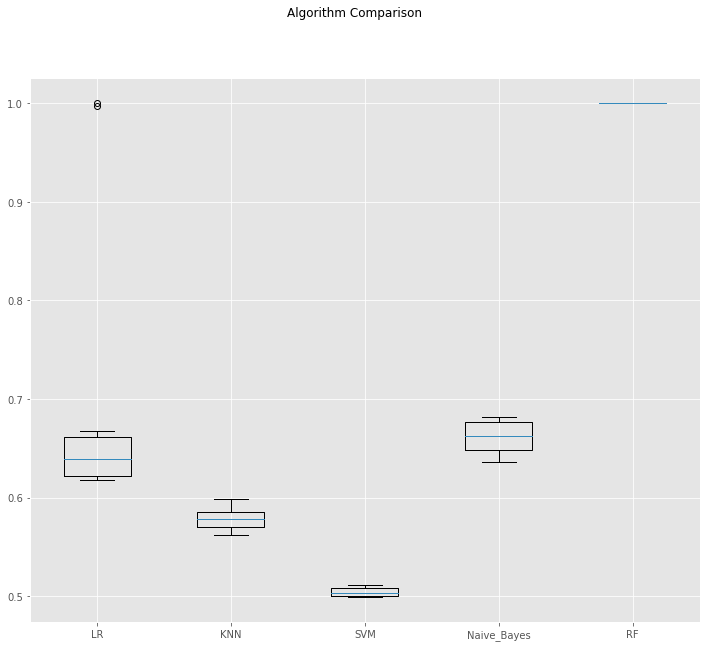

In [108]:
#boxplot algorithm comparison
fig = plt.figure(figsize=(12,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
##validate Models Individually with confusin matrix

In [ ]:
y_ran_pred

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
K_NN_Model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
K_NN_Model.fit(X_train, y_2_train)

y_neighb_pred = K_NN_Model.predict(X_test)

In [ ]:
y_neighb_pred

In [ ]:
from sklearn.svm import SVC
classifier_model = SVC(kernel = 'linear', random_state =0)
classifier_model.fit(X_train, y_2_train)

y_pred = classifier_moel.predict(X_test)

In [ ]:
y_pred

In [ ]:
sklearn.naive_bayes import GaussianNB
Naive_classifier = GaussianNB()
Naive_classifier.fit(X_train, y_2_train)

y_naive_pred = Naive_classifier.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_2_train)

y_LR = LR_model.predict(X_test)

In [ ]:
#create Confusion Matrix for test evaluation
from sklearn.metrics import confusion_matrix

#Confusion matrix for Logistic Regression
cm = confusion_matrix(y_2_test, y_LR)

In [ ]:
#Confusion matrix for Naive Bayes
cm = confusion_matrix(y_2_test, y_naive_pred)

In [ ]:
#Confusion matrix for SVC
cm = confusion_matrix(y_2_test, y_pred)

In [ ]:
#Confusion matrix for K-Neighbors Classifier
cm = confusion_matrix(y_2_test, y_neighb_pred)

In [ ]:
#Confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_2_test, y_ran_pred)